# Working with complicated dataset

Your name: Kalyn Bui

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the dataframe
blast = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#')
#get col names by splitting
header = blast.columns[0].replace("# Fields: ","").split(", ")
# print(header)

blast = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', names=header, skiprows=7, usecols=header)
#blast.info()
# drop the col and reset the index
blast.drop(columns='query acc.ver', inplace=True)
blast.set_index('subject acc.ver', inplace=True)
blast.head()


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


### Question 2
What is the average number of publications?

In [ ]:
#get the average num of publications and coerece the errors
average_pub = pd.to_numeric(blast['publications'], errors='coerce')
average_pub.mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [ ]:
# convert bonds to numeric for comparision
blast['bonds'] = pd.to_numeric(blast['bonds'].str.replace(',', ''), errors='coerce')
# get the target bonds
target_bonds = blast[blast['bonds'] > 15000].index
print(target_bonds)

Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

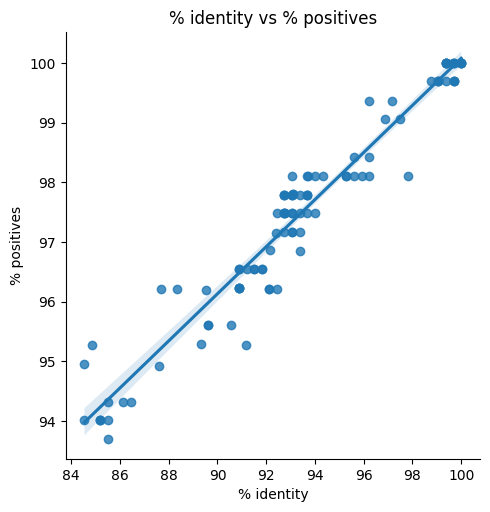

In [ ]:
sns.lmplot(x='% identity',
           y='% positives',
           data=blast)
plt.title('% identity vs % positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [ ]:
protein = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')
protein.head()

protein.drop(columns='Unnamed: 0', inplace=True)
protein.head()

blast
# merge
blast_merge = blast.merge(protein.drop_duplicates(subset=['Protein']),
                          left_index=True,
                          right_on= "Protein",
                          how="left")
# blast_merge.head()
#fill in missing values with null
blast_merge['Source'].fillna('NA')
blast_merge.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein,Source
0.0,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9,NP_904328.1,RefSeq
NaN,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47,AGK29621.1,NaN
1.0,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13,YP_220563.1,GenPept
NaN,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41,ACM24502.1,NaN
NaN,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3,AHG32084.1,NaN
